# Notebook for testing Caption Generator Program Code

### Importing Necessary Modules

In [1]:
import logging
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

# Step 1: Download dataset from Kaggle

In [2]:
import os
from import_dataset import ImportData

current_dir = os.getcwd()
destination_path = os.path.join(current_dir, 'dataset')

DataImport = ImportData()

DataImport.download(destination_path)

Path to dataset files: /home/npate145/.cache/kagglehub/datasets/nunenuh/flickr8k/versions/2
Files and folders copied successfully.


### Set Path for the Input Caption Text File and Image Dataset

In [3]:
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'dataset')
model_path = os.path.join(current_dir, 'models')
# print(dataset_path)

caption_text = dataset_path + '/' + 'captions.txt'
image_files = dataset_path + '/' + 'images'
print(caption_text, image_files)

/home/npate145/Documents/MS_in_AI/ece5831-2024/Project/ece5831-2024-final-project/dataset/captions.txt /home/npate145/Documents/MS_in_AI/ece5831-2024/Project/ece5831-2024-final-project/dataset/images


# Step 2: Input Data Processing: Test InputDataProcessing() Class
### Create a vocabulary of unique caption texts after cleaning and save cleaned texts in a file

In [4]:
# Import DataProcessing module
from data_processing import InputDataProcessing

DataProcess = InputDataProcessing()

texts = DataProcess.load_data(caption_text)

description = DataProcess.image_description(texts)
# print(f'Caption Description Raw: \n{description}')
print("Length of descriptions =" ,len(description))

cleaned_text = DataProcess.clean_data(description)
# print(f'Caption Description After Cleaning: \n{cleaned_text}')
print("Length of descriptions after cleaning =" ,len(cleaned_text))

vocabulary = DataProcess.text_vocabulary(cleaned_text)
print(f'Unique Vocabulary List: \n{vocabulary}')
print("Length of vocabulary = ", len(vocabulary))

DataProcess.save_descriptions(cleaned_text, 'description.txt')

Length of descriptions = 8091
Length of descriptions after cleaning = 8091
Unique Vocabulary List: 
{'forested', 'neat', 'pitched', 'goldcolored', 'observes', 'twos', 'interesting', 'entangled', 'egret', 'mountaineer', 'control', 'sponsored', 'brightcolored', 'pebbly', 'spiking', 'shite', 'extending', 'booklets', 'racers', 'extinguish', 'knit', 'mittened', 'marinelifethemed', 'face', 'firehose', 'barrette', 'scantily', 'skull', 'dozen', 'need', 'clinging', 'lines', 'videotaping', 'too', 'technical', 'sales', 'humans', 'faces', 'event', 'unseen', 'trees', 'staue', 'bowls', 'swim', 'offers', 'shaggy', 'recieving', 'walls', 'fabric', 'moms', 'gondola', 'motocross', 'brimmed', 'pretends', 'overshadows', 'revel', 'backpacker', 'muffs', 'opposition', 'footpath', 'least', 'weather', 'grinds', 'barrel', 'metro', 'pomeranian', 'greet', 'photographs', 'shirtless', 'biscut', 'pointer', 'league', 'waterskiis', 'granny', 'portland', 'straps', 'outfitted', 'washed', 'midafternoon', 'grapple', 'attem

# Step 3: Extract Features

In [5]:
from extract_features import ExtractFeatures

run_only_if_true = False

if run_only_if_true:
    FeatureExtract = ExtractFeatures()

    features = FeatureExtract.extract_features(image_files, 'Xception')

    FeatureExtract.save_feature_model(features, (os.path.join(model_path, 'features.pkl')))

E0000 00:00:1732843525.684739 1014638 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732843525.687966 1014638 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


0it [00:00, ?it/s]

In [6]:
from extract_features import ExtractFeatures

FeatureExtract = ExtractFeatures()
features = FeatureExtract.load_feature_model(os.path.join(model_path, 'features.pkl'))

# Step 4: Create Train, Validation and Test Dataset Files

In [7]:
from dataset_builder import DatasetBuilder

DataSetBuild = DatasetBuilder()

DataSetBuild.file_name_extractor(image_files)
DataSetBuild.split_dataset()
DataSetBuild.save_files(dataset_path)

['3030823649_3b7b6c728d.jpg', '238512430_30dc12b683.jpg', '2586911841_41b7a48c91.jpg', '2465497494_43d74df57c.jpg', '371522748_dc557bcd6c.jpg', '390992388_d74daee638.jpg', '3711030008_3872d0b03f.jpg', '501320769_31eea7b7ea.jpg', '3737492755_bcfb800ed1.jpg', '3726629271_7639634703.jpg', '2289212650_69de7a20b2.jpg', '1392272228_cf104086e6.jpg', '2940594396_20c40947b0.jpg', '3162095736_cc41dd41ff.jpg', '451326127_2d95a2e1c2.jpg', '3262301835_9f1a49b80a.jpg', '2637904605_fc355816fc.jpg', '3331102049_bc65cf6198.jpg', '3417662443_2eaea88977.jpg', '1248940539_46d33ed487.jpg', '2915183095_4ed4aa4f37.jpg', '145721496_687af9bb18.jpg', '3532587748_7e64bb223a.jpg', '621000329_84f48948eb.jpg', '465994762_1760e83c5d.jpg', '3315033940_e91f87b7f2.jpg', '2338627102_6708a9b4fd.jpg', '3293596075_973b0bfd08.jpg', '805682444_90ed9e1ef3.jpg', '3585598356_8ce815bbb9.jpg', '3656906086_7034f69ab6.jpg', '2344699642_4fae2f4e07.jpg', '3266261886_36e1323d2f.jpg', '1417637704_572b4d6557.jpg', '2815745115_c8479d560c

# Step 5: Create Train and Validation Dataset Descriptions and Features

In [8]:
from load_train_dataset import LoadTrainDataset

TrainDataset = LoadTrainDataset()

train_file = dataset_path + '/' + 'train_dataset.txt'

#train = loading_data(filename)
train_imgs = TrainDataset.load_images(train_file)
train_descriptions = TrainDataset.load_clean_descriptions('description.txt')
print(f'train dataset description: \n{train_descriptions}')

train_features = TrainDataset.load_features(os.path.join(model_path, 'features.pkl'))
print(f'train dataset features: \n{train_features}')

train dataset description: 
{'1000268201_693b08cb0e.jpg': ['<start> child in pink dress is climbing up set of stairs in an entry way <end>', '<start> girl going into wooden building <end>', '<start> little girl climbing into wooden playhouse <end>', '<start> little girl climbing the stairs to her playhouse <end>', '<start> little girl in pink dress going into wooden cabin <end>'], '1001773457_577c3a7d70.jpg': ['<start> black dog and spotted dog are fighting <end>', '<start> black dog and tricolored dog playing with each other on the road <end>', '<start> black dog and white dog with brown spots are staring at each other in the street <end>', '<start> two dogs of different breeds looking at each other on the road <end>', '<start> two dogs on pavement moving toward each other <end>'], '1009434119_febe49276a.jpg': ['<start> black and white dog is running in grassy garden surrounded by white fence <end>', '<start> black and white dog is running through the grass <end>', '<start> boston ter

In [9]:
ValidDataset = LoadTrainDataset()

train_file = dataset_path + '/' + 'validation_dataset.txt'

#train = loading_data(filename)
valid_imgs = ValidDataset.load_images(train_file)
valid_descriptions = ValidDataset.load_clean_descriptions('description.txt')
print(f'validation dataset description: \n{valid_descriptions}')

valid_features = ValidDataset.load_features(os.path.join(model_path, 'features.pkl'))
print(f'validation dataset features: \n{valid_features}')

validation dataset description: 
{'1002674143_1b742ab4b8.jpg': ['<start> little girl covered in paint sits in front of painted rainbow with her hands in bowl <end>', '<start> little girl is sitting in front of large painted rainbow <end>', '<start> small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it <end>', '<start> there is girl with pigtails sitting in front of rainbow painting <end>', '<start> young girl with pigtails painting outside in the grass <end>'], '1003163366_44323f5815.jpg': ['<start> man lays on bench while his dog sits by him <end>', '<start> man lays on the bench to which white dog is also tied <end>', '<start> man sleeping on bench outside with white and black dog sitting next to him <end>', '<start> shirtless man lies on park bench with his dog <end>', '<start> man laying on bench holding leash of dog sitting on ground <end>'], '1007129816_e794419615.jpg': ['<start> man in an orange hat starring at something <end>', '<start> man

# Step 6: Tokenizing the vocabulary

In [10]:
from tokenize_vocabulary import TokenVocab

# Instantiate the TockenVocab() class
TokVoc = TokenVocab(train_descriptions)
desc_list = TokVoc.desc_list

# Give each word a index and create tokenizer object
tokenizer = TokVoc.create_tokenizer()

vocab_size = len(tokenizer.word_index) + 1
print(f'Vocabulary Size = {vocab_size}') 

max_length = TokVoc.max_length()
print(f'Vocabulary Max Length = {max_length}') 

# Save tokenizer and max vocabulary legth to a pickle file
TokVoc.save_token([tokenizer, max_length], os.path.join(model_path, 'tokenizer.pkl'))

Vocabulary Size = 7673
Vocabulary Max Length = 34


# Step 7: Create model data generator to be used by the model.fit_generator()

In [11]:
from model_data_generator import ModelDataGenerate

# Instantiate the ModelDataGenerate() Class
DataGenerate = ModelDataGenerate(train_descriptions, 
                                 features, 
                                 tokenizer, 
                                 max_length,
                                 desc_list,
                                 vocab_size)

(a, b), c = next(DataGenerate.data_generator())
a.shape, b.shape, c.shape

((47, 2048), (47, 34), (47, 7673))

# Step 9: Training the model 

In [12]:
from caption_generator_architecture import CaptionGeneratorModelArchitecture

run_only_if_true = False

if run_only_if_true:
    # Instantiate the ModelDataGenerate() Class
    CaptionModel = CaptionGeneratorModelArchitecture(train_descriptions, 
                                                     valid_descriptions,
                                                     train_features, 
                                                     valid_features,
                                                     tokenizer,
                                                     desc_list,
                                                     vocab_size,
                                                     max_length,
                                                     epochs=100, 
                                                     batch_size=32,
                                                     learn_rate=0.001)

    model, history = CaptionModel.train_model()
    model_file_name = 'model.patel_caption_generator_cnn.keras'

    CaptionModel.save_model(model, os.path.join(model_path, model_file_name))

    model = CaptionModel.load_model(os.path.join(model_path, model_file_name))

In [13]:
print(history)

NameError: name 'history' is not defined

In [ ]:
from pickle import dump

idx = 1
# Save the complete history to a pickle file
with open('history_LR0.001_2.pkl', 'wb') as file:
    dump(history, file)

### Analyze the accuracy and loss

In [ ]:
# Function to merge all the accuracy and loss values from history
def merge_dictionary_list(dict_list):
    return {
        k: [d.get(k) for d in dict_list if k in d] # explanation A
        for k in set().union(*dict_list) # explanation B
  }

In [ ]:
from pickle import load

with open('history_LR0.001_2.pkl', 'rb') as file:
    history = load(file)

history = merge_dictionary_list(history)

history_data = {'train_accuracy': [], 'train_loss': [], 'valid_accuracy': [], 'valid_loss': []}

for key, value in history.items():
    for idx in value:
        # value1 = history[index]
        if key == 'accuracy':
            key = 'train_accuracy'
        if key == 'loss':
            key = 'train_loss'
        if key == 'val_accuracy':
            key = 'valid_accuracy'
        if key == 'val_loss':
            key = 'valid_loss'    
        history_data[key].append(idx[0])

history_data

{'train_accuracy': [0.059811338782310486,
  0.08240903913974762,
  0.09039079397916794,
  0.09889084845781326,
  0.10915310680866241,
  0.11578729003667831,
  0.12086658924818039,
  0.12345807254314423,
  0.12584222853183746,
  0.12708614766597748,
  0.1343422830104828,
  0.13776303827762604,
  0.14719602465629578,
  0.15196433663368225,
  0.16740955412387848,
  0.1747693568468094,
  0.1968487650156021,
  0.21478179097175598,
  0.23965999484062195,
  0.2644345462322235,
  0.2770809531211853,
  0.30195915699005127,
  0.31564217805862427,
  0.3358556926250458,
  0.34839847683906555,
  0.36280709505081177,
  0.3706851899623871,
  0.38996580243110657,
  0.4000207185745239,
  0.41722816228866577,
  0.42977091670036316,
  0.444490522146225,
  0.4545454680919647,
  0.471960186958313,
  0.486057847738266,
  0.49092981219291687,
  0.5064787268638611,
  0.5194361209869385,
  0.5319788455963135,
  0.5489789843559265,
  0.5606924295425415,
  0.5720949769020081,
  0.582149863243103,
  0.60547322034

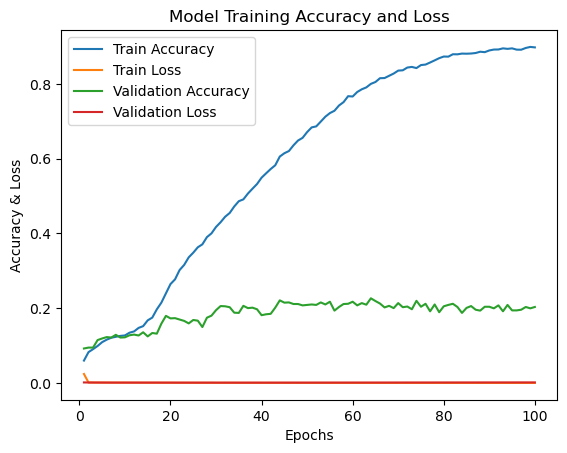

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history_data['train_accuracy']
train_loss = history_data['train_loss']
validation_accuracy = history_data['valid_accuracy']
validation_loss = history_data['valid_loss']

# Plot the data
fig, ax = plt.subplots()
ax.plot(range(1, len(train_accuracy)+1), train_accuracy, label='Train Accuracy')
ax.plot(range(1, len(train_loss)+1), train_loss, label='Train Loss')
ax.plot(range(1, len(validation_accuracy)+1), validation_accuracy, label='Validation Accuracy')
ax.plot(range(1, len(validation_loss)+1), validation_loss, label='Validation Loss')

# Add title
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy & Loss')
ax.set_title('Model Training Accuracy and Loss')

# Add a legend
plt.legend()
plt.show()


# Step 10:  Test Model on Random Images

/home/npate145/Documents/MS_in_AI/ece5831-2024/Project/ece5831-2024-final-project/dataset/images/390987167_2d5905b459.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step



start young man is sitting in the grass and reading end
/home/npate145/Documents/MS_in_AI/ece5831-2024/Project/ece5831-2024-final-project/dataset/images/2490179961_e842fda5eb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step



start girl wearing pink shirt and brown shorts sitting on his picks end
/home/npate145/Documents/MS_in_AI/ece5831-2024/Project/ece5831-2024-final-project/dataset/images/1348957576_c4a78eb974.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step



start young boy is sitting at the water at the beach end
/home/npate145/Documents/MS_in_AI/ece5831-2024/Project/ece5831-2024-final-project/dataset/images/2561334141_0aacefa5e7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step



start young boy is jumping in the air and has the ground end
/home/npate145/Documents/MS_in_AI/ece5831-2024/Project/ece5831-2024-final-project/dataset/image

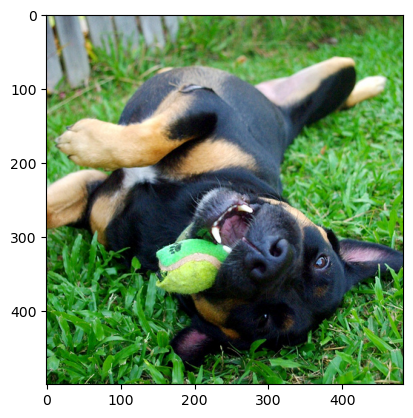

In [9]:
from image_caption_generator import ImageCaptionGenerator
import os
from PIL import Image
import matplotlib.pyplot as plt
import random

CaptionGenerator = ImageCaptionGenerator()

image_dir = os.path.join(os.getcwd(), 'dataset', 'images')

files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
image_files = random.sample(files, 5)

for file in image_files:
    image_file = os.path.join(image_dir, file)
    print(image_file)
    img_features = CaptionGenerator.extract_features(image_file)
    img = Image.open(image_file)

    description = CaptionGenerator.generate_desc(img_features)
    print("\n\n")
    print(description)
    plt.imshow(img)

plt.show()